In [1]:
#Data Exploration & Preprocessing (EDA)
import pandas as pd
import numpy as np

df = pd.read_csv("single_genre_artists.csv")  

In [2]:
#Basic exploration 
df.shape
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [3]:
#Check missing values & duplicates
df.isna().sum()
df.duplicated().sum()


np.int64(0)

In [4]:
#Drop Unnecessary Columns 
df = df.drop_duplicates()

In [5]:
#Correct drop code
drop_cols = [
    'id_songs',
    'name_song',
    'id_artists',
    'release_date',
    'genres',
    'name_artists'
]

df = df.drop(columns=drop_cols)


In [6]:
# Feature Selection 
# Use ONLY sound-related features

features = [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms'
]

X = df[features]


In [7]:
#Safety check
X.isna().sum()


danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [8]:
#Data Normalization 
# StandardScaler 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Loudness & tempo dominate without scaling


In [36]:
inertia = kmeans.inertia_
print(inertia )

593031.0894267297


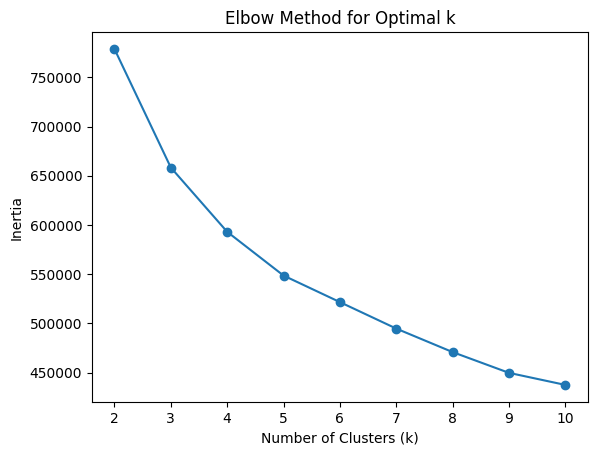

In [9]:
#Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [10]:
#Elbow around k = 4 or 5 indicates optimal balance. coding for elbow method

In [11]:
#Silhouette Score
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.203
k=3, Silhouette Score=0.242
k=4, Silhouette Score=0.231
k=5, Silhouette Score=0.186
k=6, Silhouette Score=0.186
k=7, Silhouette Score=0.165
k=8, Silhouette Score=0.172
k=9, Silhouette Score=0.172
k=10, Silhouette Score=0.159


In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [13]:
#Pick highest silhouette score
silhouette_score(X_scaled, df['Cluster'])

0.23106641264473862

In [14]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X_scaled, df['Cluster'])
#Lower DB score = better clustering

1.5296828507168276

In [15]:
#Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


<Axes: xlabel='PCA1', ylabel='PCA2'>

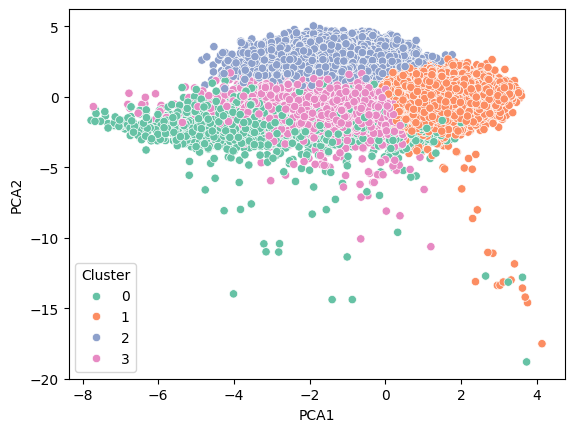

In [16]:
#Scatter Plot
import seaborn as sns

sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=df,
    palette='Set2'
)


In [31]:
# Count number of songs in each cluster
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()

print(cluster_counts)


0     7865
1    46384
2    12409
3    29179
Name: count, dtype: int64


In [18]:
#Cluster Interpretation
# Mean feature values per cluster
cluster_profile = df.groupby('Cluster')[features].mean()

cluster_profile


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Cluster,,,,,,,,,,
0,0.485341,0.415775,-13.954724,0.059929,0.646652,0.810613,0.188557,0.449986,114.301014,231386.462428
1,0.634711,0.707636,-7.416184,0.077040,0.242192,0.021039,0.201125,0.685616,125.294702,224649.058878
2,0.664340,0.466488,-13.385665,0.834554,0.585597,0.000975,0.435223,0.583509,100.336080,96913.082601
3,0.505186,0.341825,-12.120023,0.060990,0.699190,0.017446,0.183097,0.426877,113.401800,224876.823023


In [19]:
cluster_profile.T

Cluster,0,1,2,3
danceability,0.485341,0.634711,0.664340,0.505186
energy,0.415775,0.707636,0.466488,0.341825
loudness,-13.954724,-7.416184,-13.385665,-12.120023
speechiness,0.059929,0.077040,0.834554,0.060990
acousticness,0.646652,0.242192,0.585597,0.699190
instrumentalness,0.810613,0.021039,0.000975,0.017446
liveness,0.188557,0.201125,0.435223,0.183097
valence,0.449986,0.685616,0.583509,0.426877
tempo,114.301014,125.294702,100.336080,113.401800
duration_ms,231386.462428,224649.058878,96913.082601,224876.823023


In [22]:
# Assuming 'Cluster' is the column with cluster labels
cluster_means = df.groupby('Cluster')[features].mean()

# Print the Cluster 0 means
print(cluster_means.loc[0])


danceability             0.485341
energy                   0.415775
loudness               -13.954724
speechiness              0.059929
acousticness             0.646652
instrumentalness         0.810613
liveness                 0.188557
valence                  0.449986
tempo                  114.301014
duration_ms         231386.462428
Name: 0, dtype: float64


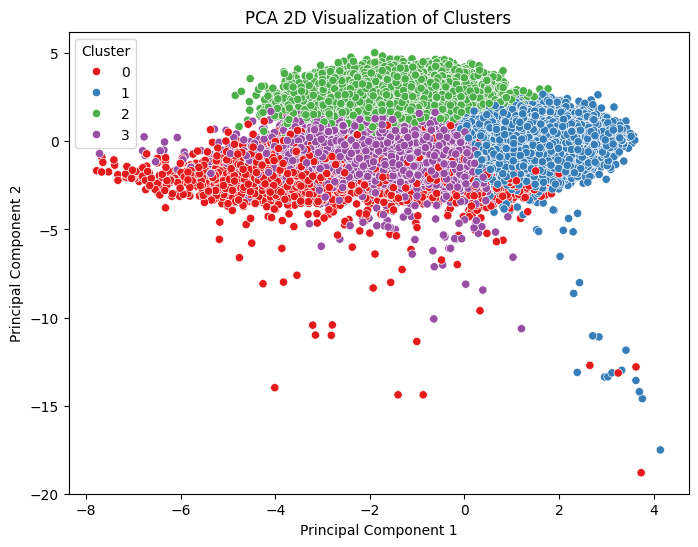

In [23]:
#PCA – 2D Scatter Plot

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0],
                y=pca_result[:,1],
                hue=df['Cluster'],
                palette='Set1')

plt.title("PCA 2D Visualization of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


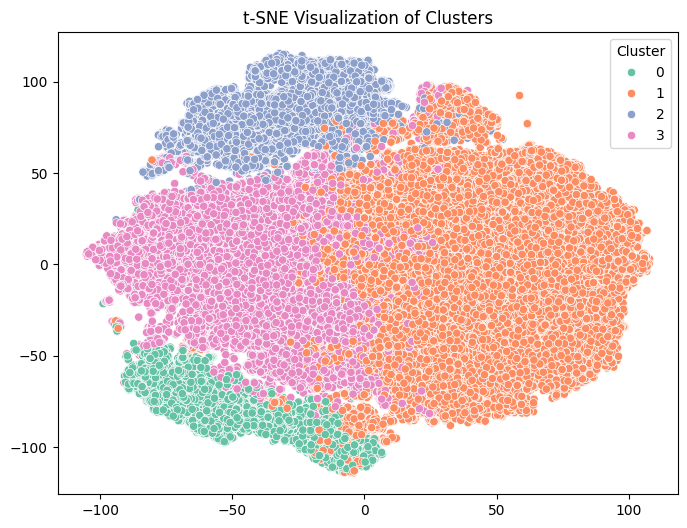

In [28]:
#t-SNE Visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_result[:,0],
                y=tsne_result[:,1],
                hue=df['Cluster'],
                palette='Set2')

plt.title("t-SNE Visualization of Clusters")
plt.show()

<Axes: >

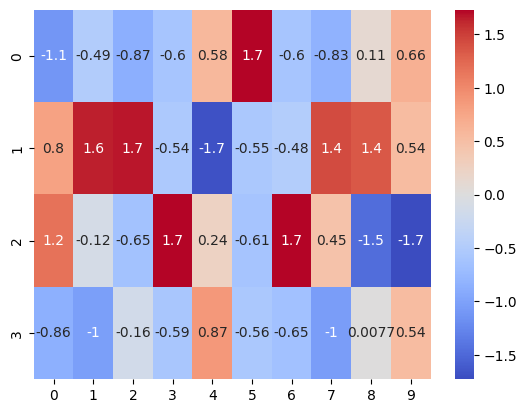

In [21]:
#visualizes the average feature values of each cluster using a heatmap.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_profile = scaler.fit_transform(cluster_profile)

sns.heatmap(scaled_profile, annot=True, cmap='coolwarm')


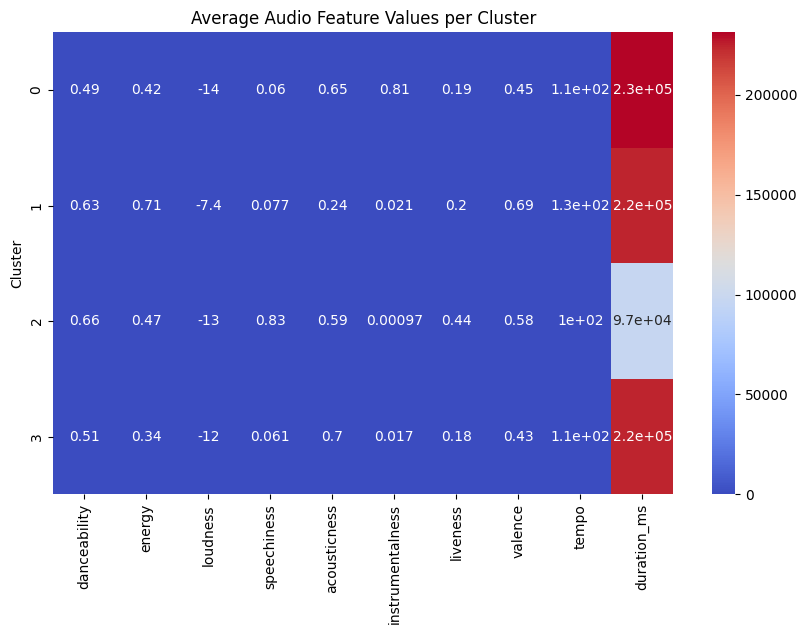

In [20]:
#visualizes the average feature values of each cluster using a heatmap.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap='coolwarm')
plt.title("Average Audio Feature Values per Cluster")
plt.show()


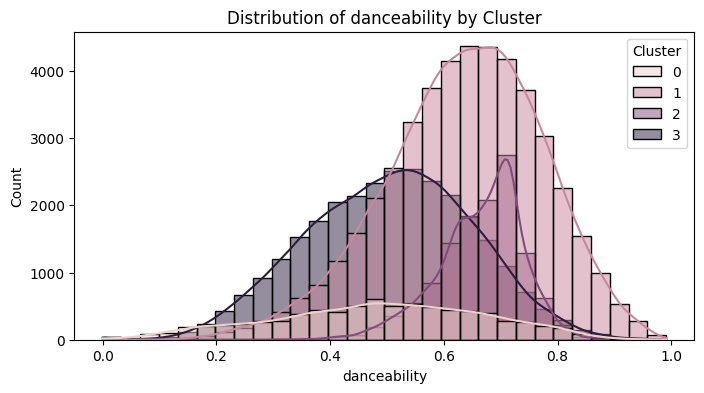

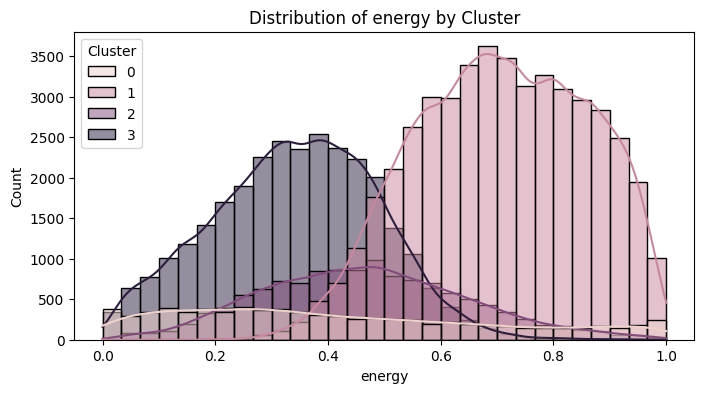

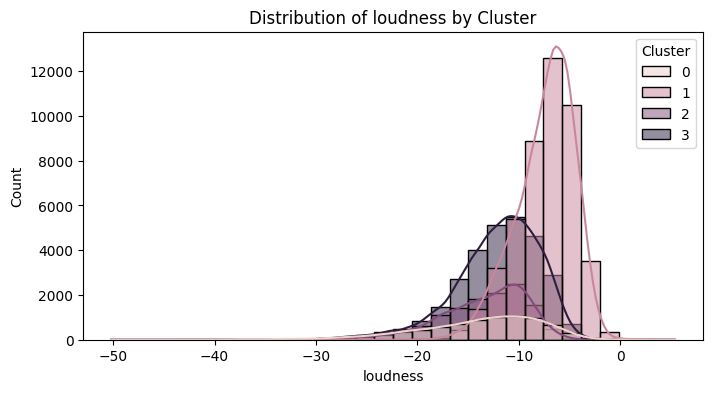

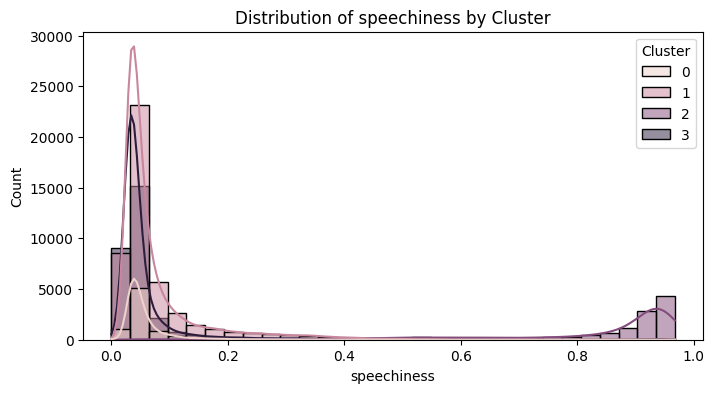

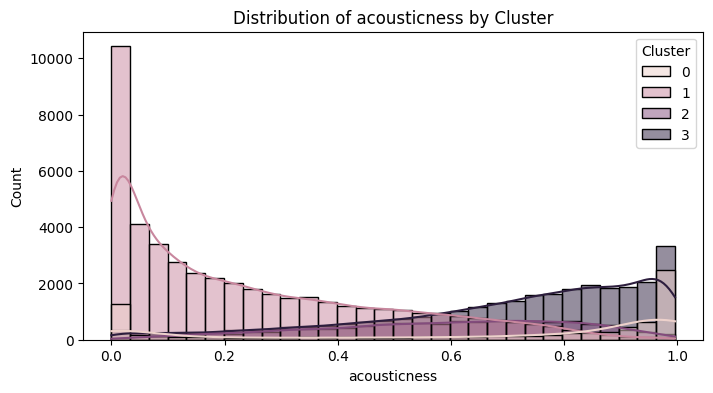

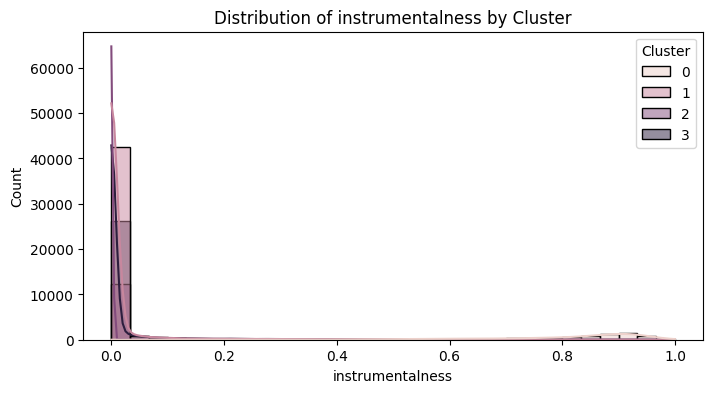

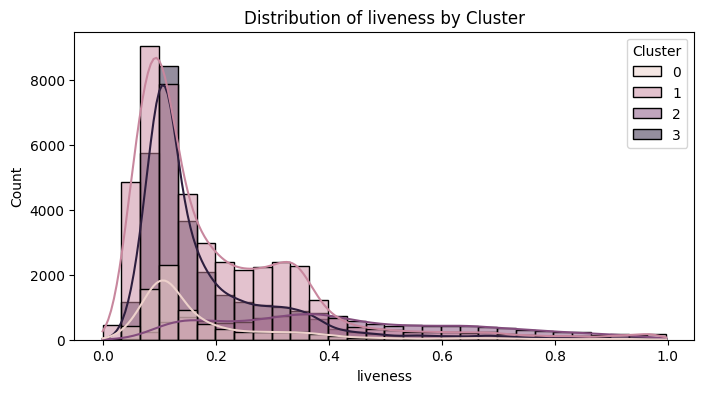

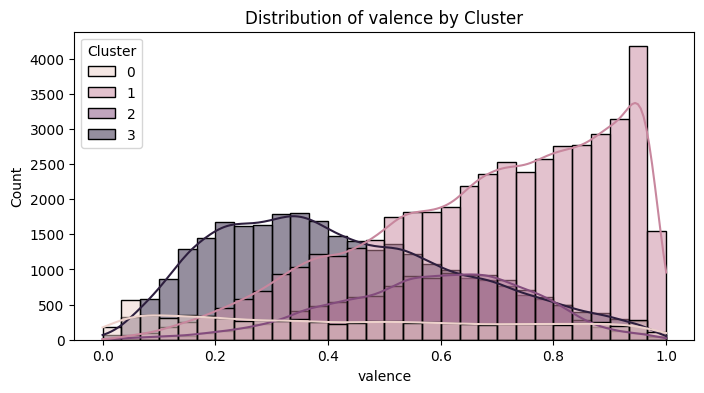

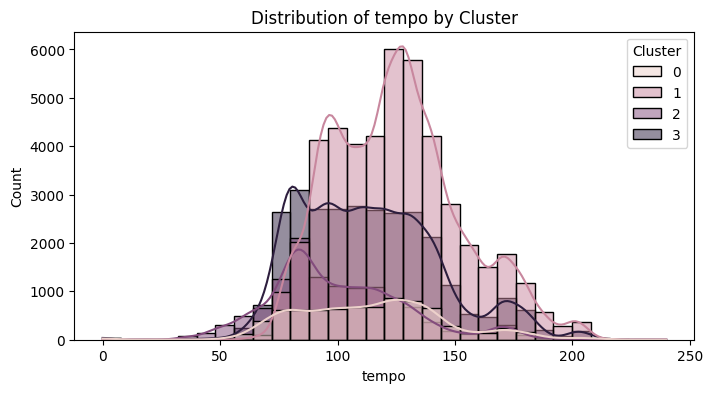

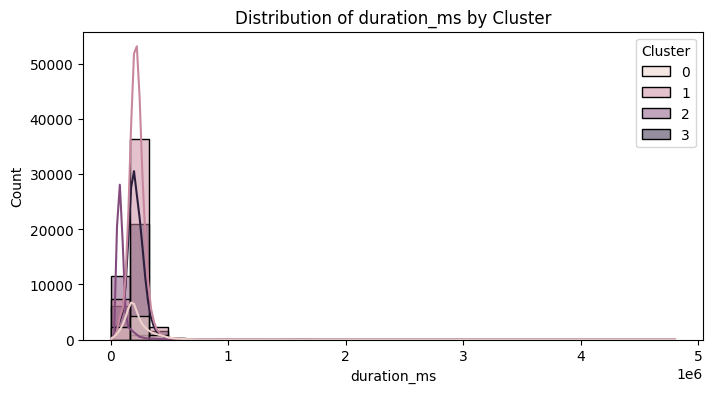

In [32]:
#Distribution Plots per Feature
for feature in [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms'
]:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df,
                 x=feature,
                 hue='Cluster',
                 kde=True,
                 bins=30)

    plt.title(f"Distribution of {feature} by Cluster")
    plt.show()

In [1]:
final_output.to_csv('amazon_music_clusters.csv', index=False)
print(" Saved Amazon Music clustering results")

NameError: name 'final_output' is not defined